In [149]:
%autoreload
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2

from digits_classifier import MNIST19wEmpty, Digits, RandomScratch, RandomBackground, RandomEdgeLines, RandomBrightness

batch_size = 64

In [102]:
def show_dataset(dataclass, transform):
    torch.manual_seed(0)
    trainset = dataclass(root='./data', train=True,
                          download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                                  shuffle=True, num_workers=1)

    b=next(iter(trainloader))
    plt.imshow(torchvision.utils.make_grid(b[0]).mean(0), cmap='gray')
    # return b

## the original MNIST

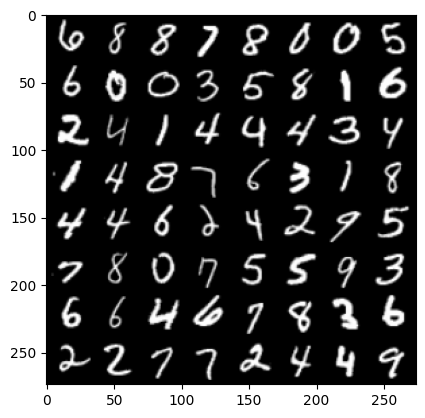

In [103]:
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor()])
show_dataset(torchvision.datasets.MNIST, transform)

## Empty instead of 0

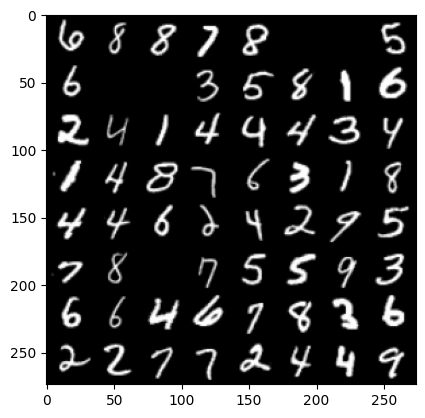

In [104]:
show_dataset(MNIST19wEmpty, transform)

## combined with printed digits

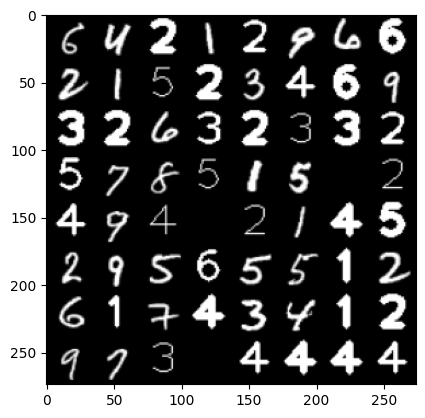

In [105]:
show_dataset(Digits, transform)

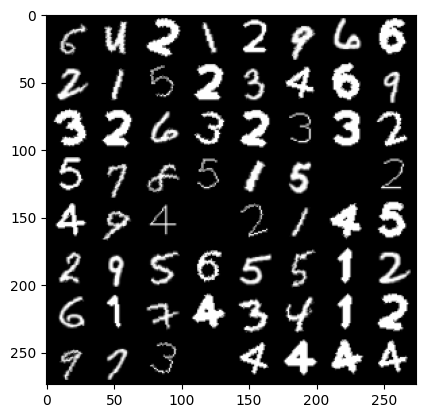

In [106]:
# add slight rotation:
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20),
        ])
show_dataset(Digits, transform)

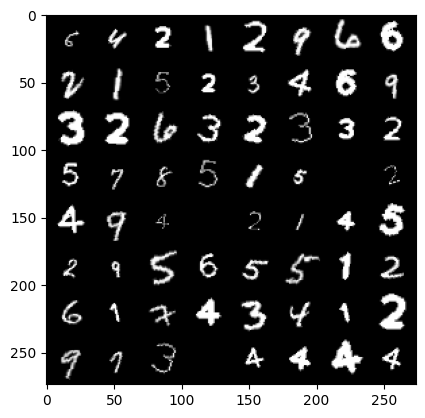

In [107]:
#scaling
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20, scale=(0.5,1)),
                  # RandomEdgeLines(),
         # RandomBackground()
         # T.RandomAffine(degrees=20, translate=(0.2,0.2), scale=(0.5,1), shear=5),

        # T.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
        ])
show_dataset(Digits, transform)

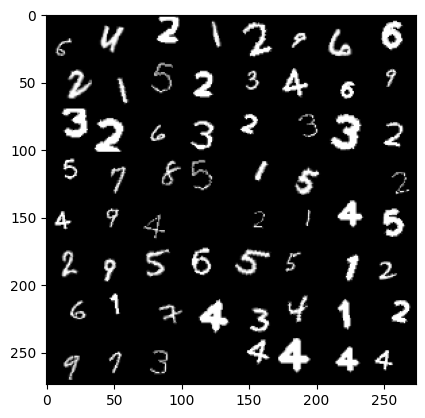

In [108]:
#shifting
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20, scale=(0.5,1), translate=(0.2,0.2)),
                  # RandomEdgeLines(),
         # RandomBackground()
         # T.RandomAffine(degrees=20, translate=(0.2,0.2), scale=(0.5,1), shear=5),

        # T.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
        ])
show_dataset(Digits, transform)

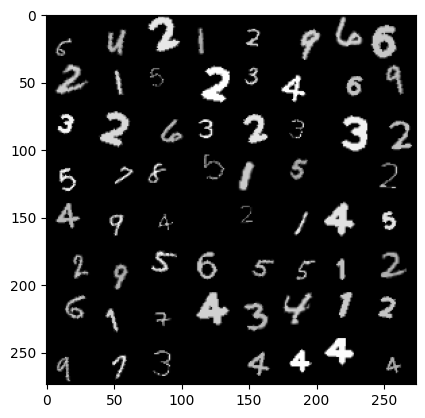

In [121]:
# bright the digits noise:
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20, scale=(0.5,1), translate=(0.2,0.2)),
         RandomBrightness()
                  # RandomEdgeLines(),
         # RandomBackground()
         # T.RandomAffine(degrees=20, translate=(0.2,0.2), scale=(0.5,1), shear=5),

        # T.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
        ])
show_dataset(Digits, transform)

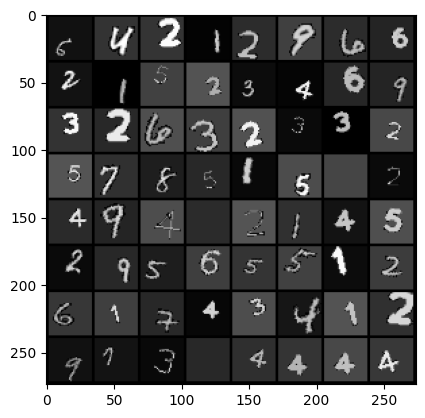

In [145]:
# add background noise:
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20, scale=(0.5,1), translate=(0.2,0.2)),
         RandomBrightness(),
                  # RandomEdgeLines(),
         RandomBackground()
         # T.RandomAffine(degrees=20, translate=(0.2,0.2), scale=(0.5,1), shear=5),

        # T.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
        ])
show_dataset(Digits, transform)

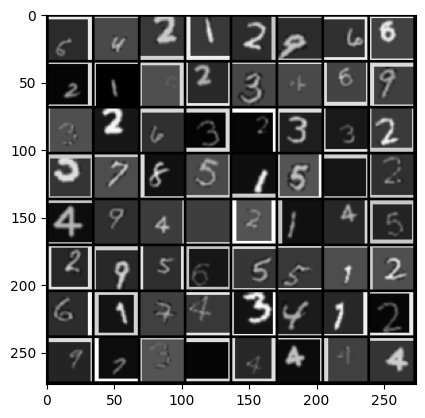

In [150]:
#and last one - add lines which will be the borders of the cells of the sudoku
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20, scale=(0.5,1), translate=(0.2,0.2)),
         RandomBrightness(),
         T.RandomErasing(p=0.1, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=0, inplace=False),
         RandomBackground(),
         RandomEdgeLines(),
        ])
show_dataset(Digits, transform)

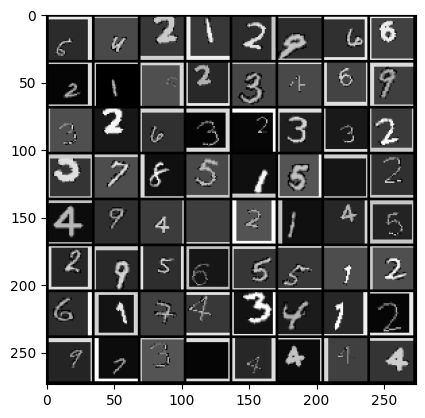

In [146]:
#and last one - add lines which will be the borders of the cells of the sudoku
transform = T.Compose(
        [T.Resize(32),
         T.ToTensor(),
         T.RandomAffine(degrees=20, scale=(0.5,1), translate=(0.2,0.2)),
         RandomBrightness(),
         T.RandomErasing(p=0.1, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=0, inplace=False),
         RandomBackground(),
         RandomEdgeLines(),
        ])
show_dataset(Digits, transform)